# LA example 

(437, 494)


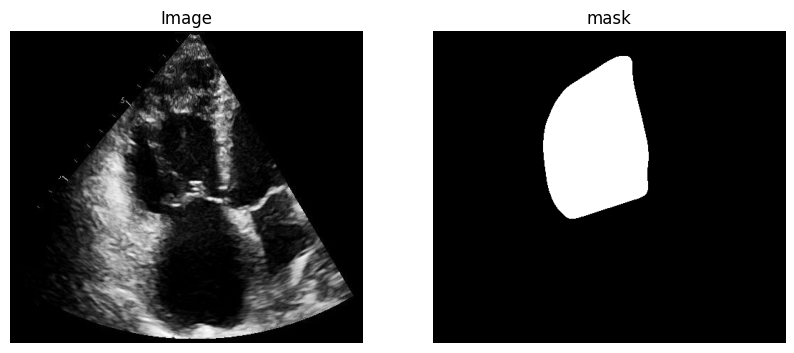

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image and mask
image_path = '/mnt/rcl-server/workspace/baraa/echo-segmentation-2/images/2.25.71578852731725080043104470352023927115_2.25.151335858523468792713249948465613400947_2__RV_area_d_A4C_calc.png'  # Replace with your image path
mask_path = '/mnt/rcl-server/workspace/baraa/echo-segmentation-2/masks/2.25.71578852731725080043104470352023927115_2.25.151335858523468792713249948465613400947_2__RV_area_d_A4C_calc.png'    # Replace with your mask path

image= Image.open(image_path)
mask = Image.open(mask_path)
print(np.array(image).shape)
mask = mask.convert("L")

# Display the image and mask side by side
plt.figure(figsize=(10, 5))

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Image')
plt.axis('off')

# Display the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # Assuming the mask is a grayscale image
plt.title('mask')
plt.axis('off')

plt.show()


# LA overlay

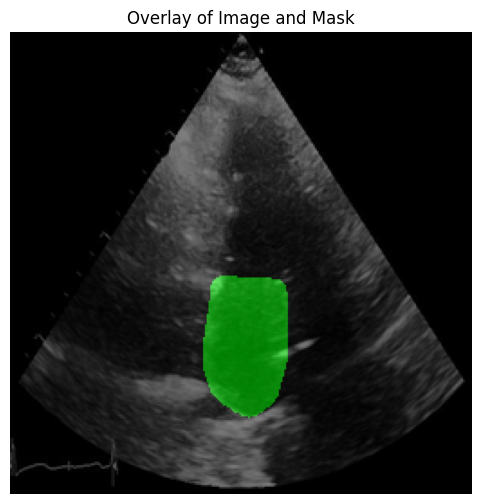

In [39]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Convert the image and mask to numpy arrays
image_np = np.array(image)
# If the image is 2D (grayscale), convert it to 3D by stacking
if len(image_np.shape) == 2: # use this in training 
    image_np = np.stack([image_np] * 3, axis=-1)

mask_np = np.array(mask.convert("L"))

# Normalize the mask to be in the range [0, 1]
# mask_normalized = mask_np / 255.0

# Define the alpha (transparency) factor for the mask
alpha = 0.5  # Adjust this value between 0 (transparent) and 1 (opaque)

# Create a color mask by applying the normalized mask with an alpha value
color_mask = np.stack([mask_np] * 3, axis=-1)  # Make it 3 channels
color_mask = color_mask * np.array([0, 1, 0])*255 # Apply the mask in green

# Blend the original image with the color mask
overlay = (1 - alpha) * image_np + alpha * color_mask 

# Ensure the values are within the correct range and convert back to uint8
overlay = np.clip(overlay, 0, 255).astype(np.uint8)

# Display the overlayed image
plt.figure(figsize=(6, 6))
plt.imshow(overlay)
plt.title('Overlay of Image and Mask')
plt.axis('off')
plt.show()


# Trying dataset

In [36]:
import numpy as np
import pandas as pd

import cv2
import os


# Path to the CSV file and dataset directory
csv_file = r"/home/baraa.abdelsamad/SAM2-ChannelBased/data/RA_train.csv"  # Replace with your CSV file path
data_dir = r"/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/"  # Path to dataset (LabPics 1)

# Read the CSV file
df = pd.read_csv(csv_file)

# List to store image and annotation paths
data = []

# Iterate through the filenames in the CSV
for index, row in df.iterrows():
    filename = row['file_name']  # Access the filename from the 'filename' column in the CSV
    image_path = os.path.join(data_dir, "images/", filename+ ".png")
    annotation_path = os.path.join(data_dir, "masks/", filename + ".png")
    
    # Add to the data list
    data.append({"image": image_path, "annotation": annotation_path})

# Optionally, print the first few entries to verify
print(data[:5])

def read_batch_old(data): # read random image and its annotaion from  the dataset (LabPics)

   #  select image

        ent  = data[np.random.randint(len(data))] # choose random entry
        Img = cv2.imread(ent["image"],1)  # read image
        # Convert BGR to RGB
        Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
        print(Img.shape)

        ann_map = cv2.imread(ent["annotation"],1) # read annotation

   # resize image

        r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]]) # scalling factor
        Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
        print(f"img shape = {Img.shape}")
        ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)),interpolation=cv2.INTER_NEAREST)
        print(f"mask shape: {ann_map.shape}")
   # merge vessels and materials annotations

        mat_map = ann_map[:,:,0] # material annotation map
        print(mat_map.shape)
        ves_map = ann_map[:,:,2] # vessel  annotaion map
        print(ves_map.shape)
        mat_map[mat_map==0] = ves_map[mat_map==0]*(mat_map.max()+1) # merge maps
        print(np.unique(ann_map))

   # Get binary masks and points

        inds = np.unique(mat_map)[1:] # load all indices
        points= []
        masks = []
        for ind in inds:
            mask=(mat_map == ind).astype(np.uint8) # make binary mask corresponding to index ind
            masks.append(mask)
            coords = np.argwhere(mask > 0) # get all coordinates in mask
            yx = np.array(coords[np.random.randint(len(coords))]) # choose random point/coordinate
            points.append([[yx[1], yx[0]]])
        return Img,np.array(masks),np.array(points), np.ones([len(masks),1])


[{'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.303205808567141670970926639986321802310_2.25.23936708830284570006874049250312454990_2__RA_Vol_MOD_A4C_calc.png', 'annotation': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/masks/2.25.303205808567141670970926639986321802310_2.25.23936708830284570006874049250312454990_2__RA_Vol_MOD_A4C_calc.png'}, {'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.59725375199207978909088863690773612851_2.25.44982182398041843845843462117706089313_2__RA_Vol_MOD_A4C_calc.png', 'annotation': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/masks/2.25.59725375199207978909088863690773612851_2.25.44982182398041843845843462117706089313_2__RA_Vol_MOD_A4C_calc.png'}, {'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.311516365306464807403881746301462266325_2.25.169863032067677783560162238221456720886_2__RA_Vol_MOD_A4C_calc.png', 'annotation'

In [38]:
import numpy as np
import pandas as pd
import cv2
import os

# Path to the CSV file and dataset directory
csv_file = r"/home/baraa.abdelsamad/SAM2-ChannelBased/data/RA_train.csv"  # Replace with your CSV file path
data_dir = r"/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/"  # Path to dataset (LabPics 1)

# Read the CSV file
df = pd.read_csv(csv_file)

# List to store image and annotation paths
data = []

# Iterate through the filenames in the CSV
for index, row in df.iterrows():
    filename = row['file_name']  # Access the filename from the 'filename' column in the CSV
    image_path = os.path.join(data_dir, "images/", filename+ ".png")
    annotation_path = os.path.join(data_dir, "masks/", filename + ".png")
    
    # Add to the data list
    data.append({"image": image_path, "annotation": annotation_path})

# Optionally, print the first few entries to verify
print(data[:5])

def read_batch(data): # read random image and its annotation from the dataset (LabPics)

    # select image
    ent  = data[np.random.randint(len(data))] # choose random entry
    Img = cv2.imread(ent["image"],1)  # read image
    # Convert BGR to RGB
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    print(Img.shape)

    ann_map = cv2.imread(ent["annotation"],1) # read annotation

    # resize image
    r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]]) # scaling factor
    Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
    print(f"img shape = {Img.shape}")
    ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)), interpolation=cv2.INTER_NEAREST)
    print(f"mask shape: {ann_map.shape}")

    # merge vessels and materials annotations
    mat_map = ann_map[:,:,0] # material annotation map
    # print(mat_map.shape)
    ves_map = ann_map[:,:,2] # vessel annotation map
    # print(ves_map.shape)
    mat_map[mat_map==0] = ves_map[mat_map==0]*(mat_map.max()+1) # merge maps
    # print(np.unique(ann_map))

    # Get binary masks, points, and bounding boxes
    inds = np.unique(mat_map)[1:] # load all indices
    points = []
    masks = []
    bboxes = []
    
    for ind in inds:
        mask = (mat_map == ind).astype(np.uint8) # make binary mask corresponding to index ind
        masks.append(mask)
        coords = np.argwhere(mask > 0) # get all coordinates in mask
        yx = np.array(coords[np.random.randint(len(coords))]) # choose random point/coordinate
        points.append([[yx[1], yx[0]]])
        
        # Calculate bounding box
        y_min, x_min = coords.min(axis=0)
        y_max, x_max = coords.max(axis=0)
        bbox = [x_min, y_min, x_max, y_max]  # [x_min, y_min, x_max, y_max]
        bboxes.append(bbox)
    
    return Img, np.array(masks), np.array(points), np.array(bboxes)


[{'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.303205808567141670970926639986321802310_2.25.23936708830284570006874049250312454990_2__RA_Vol_MOD_A4C_calc.png', 'annotation': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/masks/2.25.303205808567141670970926639986321802310_2.25.23936708830284570006874049250312454990_2__RA_Vol_MOD_A4C_calc.png'}, {'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.59725375199207978909088863690773612851_2.25.44982182398041843845843462117706089313_2__RA_Vol_MOD_A4C_calc.png', 'annotation': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/masks/2.25.59725375199207978909088863690773612851_2.25.44982182398041843845843462117706089313_2__RA_Vol_MOD_A4C_calc.png'}, {'image': '/mnt/rcl-server/workspace/baraa/echo-segmentation-2-resized/images/2.25.311516365306464807403881746301462266325_2.25.169863032067677783560162238221456720886_2__RA_Vol_MOD_A4C_calc.png', 'annotation'

In [33]:
image,mask,input_point, input_label = read_batch(data) # load data batch

(256, 256, 3)
img shape = (1024, 1024, 3)
mask shape: (1024, 1024, 3)
(1024, 1024)
(1024, 1024)
[0 1]


In [45]:
image,mask,input_point, bboxes = read_batch(data) # load data batch
print(mask.shape)
print(image.shape) # kda msh mhtagin n2leb?
print(bboxes)

(256, 256, 3)
img shape = (1024, 1024, 3)
mask shape: (1024, 1024, 3)
(1, 1024, 1024)
(1024, 1024, 3)
[[252 564 463 815]]
